## Latent "Purposes" in Mobile Apps 


Think of Android applications as "documents", where "words" are the "permissions" that each app requests. Each app has a set of latent "purposes" (topics); a "purpose" may be a specific task (such as taking photographs and uploading them to the internet), and an application may have a mixture of purposes of varying strength.

Can we uncover these purposes from a dataset of Android applications and the permissions they request?

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

### Part A: Load the data 

The [dataset](http://www.mariofrank.net/andrApps/) contains ~180,000 applications from the Android app store, including each app's name, description and permissions requested. For more about Android app permissions, see [this report](http://www.pewinternet.org/2015/11/10/an-analysis-of-android-app-permissions/).

   * Download the data and unzip it into the same folder as this notebook.
   * Rename the CSV file to "android.csv".
   * Run the cells below to load the data into the notebook.

This may take up ~2GB of RAM.

In [9]:
df = pd.read_csv("android.csv", sep=",",  thousands=",")

In [10]:
df["Number of ratings"] = df["Number of ratings"].astype(int) # fix data type
df = df.drop_duplicates(subset=["App"]).reset_index(drop=True)

In [11]:
df.head(n=3)

,App,Package,Category,Description,Rating,Number of ratings,Price,Related apps,Dangerous permissions count,Safe permissions count,...,Your personal information : read Browser's history and bookmarks (D),Your personal information : read calendar events (D),Your personal information : read contact data (D),Your personal information : read sensitive log data (D),Your personal information : read user defined dictionary (D),Your personal information : retrieve system internal state (S),Your personal information : set alarm in alarm clock (S),Your personal information : write Browser's history and bookmarks (D),Your personal information : write contact data (D),Your personal information : write to user defined dictionary (S)
0,Google Maps,com.google.android.apps.maps,Travel & Local,"Download the latest release of Google Maps, an...",4.4,1438259,$0.00,"{com.jsdfproductions.ctatrackerpro, com.alk.co...",17.0,8,...,0,0,1,0,0,0,0,0,1,0
1,Snowfall Live Wallpaper,fishnoodle.snowfall_free,Personalization,Snowfall Live Wallpaper: Wintertime on your ho...,4.3,18147,$0.00,"{colfore.wallpaper.snowfree, com.tabsoft.wallp...",0.0,0,...,0,0,0,0,0,0,0,0,0,0
2,Aquarium Live Wallpaper,fishnoodle.aquarium_free,Personalization,A beautiful tropical fish tank live wallpaper!...,4.1,62145,$0.00,"{com.convisual.lwp.fishometerlite, com.accessl...",0.0,0,...,0,0,0,0,0,0,0,0,0,0


### Part B: Convert each app into a "document" 

The code below does the following:

   * Filter out all the columns except the permission columns.
   * Convert this dataframe into a numpy matrix.

There are thus 180295 apps (documents) and 173 permissions (words).

   - `X` is the "document" or "word-frequency" matrix.
   - `permission_columns` contains the words ordered by their column index in X.
   - `app_names` contains the application names ordered by their row index in X.
   - `app_ratings` contains the *number* of application ratings (not the ratings themselves).

In [12]:
permission_columns = list(df.columns[10:])
app_names = list(df["App"])
app_ratings = np.array(df["Number of ratings"])
#print(df[permission_columns])
df_perms = df[permission_columns]
X=df_perms.to_numpy()
#print(X.shape)
#print(df_perms.shape)
#del df # uncomment to free up RAM
del df
#del df_perms # uncomment to free up RAM
del df_perms

### Part C: Downweight "stop-words" 

There are some permissions requested by almost all applications (like "INTERNET"), they are similar to stop-words ("the", "and", etc.) in natural language. We can downweight them by TF-IDF normalization.

   * Use the `TfidfTransformer` class in `scikit-learn` to transform X.

In [13]:
########################################################################
######################### Write your code here #########################
########################################################################

from sklearn.feature_extraction.text import TfidfTransformer

tf_transformer=TfidfTransformer()
X_transformer=tf_transformer.fit_transform(X)

#print(tf.shape)
X_transformer_array=X_transformer.toarray()
#print(X_transformer_array)

### Part D: Discover 10 "topics" 

   * Use the `LatentDirichletAllocation` class in `scikit-learn` to fit 10 topics to the data.
   * Use 10 max iterations, set `n_jobs=-1` to use all cores on your machine (if it helps).
   * Feel free to understand and play around with other parameters.
   * This may take around 3 minutes to run.

In [14]:
%%time
########################################################################
######################### Write your code here #########################
########################################################################

num_topics=10
from sklearn.decomposition import LatentDirichletAllocation

lda=LatentDirichletAllocation(n_components=num_topics,random_state=0,max_iter=10,n_jobs=-1)
lda_fit=lda.fit(X_transformer_array)



Wall time: 1min 3s


In [15]:
topic_permissions_distributions = np.array([row / row.sum() for row in lda.components_])
print(topic_permissions_distributions.sum(axis=1))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


Now each app can be viewed as a distribution over these 10 topics, and each topic is a distribution over all the permissions in the data.

### Part E: List the top 10 "words" in each topic 

Do any of the topics correspond to meaningful app "purposes"? List the ones you find meaningful below:

   * Topic #i: "your interpretation"

In [26]:
########################################################################
######################### Write your code here #########################
########################################################################
num_top_permissions=10

def print_top_permissions(topic_permissions_distributions, num_top_permissions):
    #vocab = vectorizer.get_feature_names()
    num_topics = len(topic_permissions_distributions)
    print('Displaying the top %d permissions per topic and their probabilities within the topic...' % num_top_permissions)
    print()

    for topic_idx in range(num_topics):
        print('[Topic ', topic_idx, ']', sep='')
        sort_indices = np.argsort(-topic_permissions_distributions[topic_idx])
        for rank in range(num_top_permissions):
            word_idx = sort_indices[rank]
            #print(df[word_idx], ':',
            #      topic_permissions_distributions[topic_idx, word_idx])
            print(permission_columns[word_idx],':',
                  topic_permissions_distributions[topic_idx, word_idx])
        print()

print_top_permissions(topic_permissions_distributions, num_top_permissions)

Displaying the top 10 permissions per topic and their probabilities within the topic...

[Topic 0]
Your location : coarse (network-based) location (D) : 0.2564494999491136
Your location : fine (GPS) location (D) : 0.24650468420432847
Network communication : full Internet access (D) : 0.15421500176021152
Network communication : view network state (S) : 0.10148873290783794
Phone calls : read phone state and identity (D) : 0.08057643744231588
Storage : modify/delete USB storage contents modify/delete SD card contents (D) : 0.06369555562003526
Services that cost you money : directly call phone numbers (D) : 0.05193934584426721
Your personal information : read sensitive log data (D) : 0.021990441913125703
Network communication : view Wi-Fi state (S) : 0.019562355914579662
Default : access checkin properties (S) : 0.0009866530013707693

[Topic 1]
Hardware controls : control vibrator (S) : 0.44428245980772507
Network communication : full Internet access (D) : 0.14349279845405583
Network commu

*** ANSWER HERE IN TEXT ***

[Topic 0]: something to do with GPS,location
[Topic 2]: something to do with SMS/Communication
[Topic 5]: something to do with Media
[Topic 9]: something to with Contacts

### Part F: For each topic, list the top 3 apps with at least 100000 ratings having the highest probability assigned to that topic 

   - This further helps us understand what the topics actually mean.
   - However, the data is noisy and this exercise may result in listing a bunch of obscure apps.
   - Hence, filtering out all apps with less than 100000 ratings may help.

In [17]:
########################################################################
######################### Write your code here #########################
########################################################################
app_topic_matrix=lda.transform(X_transformer_array)


In [18]:
#top3_apps_for_topic=np.argsort(-app_topic_matrix,axis=0)
apps_for_topic_sorted=app_topic_matrix.argsort(0)[::-1]
apps_for_topic_with_rating=[]

for cidx in range(num_topics):
    apps_for_topic_with_rating.append([index for index in apps_for_topic_sorted[:,cidx] if app_ratings[index]>100000])

In [19]:
#print(top3_apps_for_topic)

for i in range(apps_for_topic_sorted.shape[1]):
    print("Top three apps for Topic ",i)
    for idx in apps_for_topic_with_rating[i][0:3]:
        print(app_names[idx])

    print()

Top three apps for Topic  0
Dictionary.com
Air Control Lite
Paper Toss

Top three apps for Topic  1
Live Holdem Poker Pro
Vaulty Free Hides Pictures
Bubble Blast 2

Top three apps for Topic  2
Angry Birds Seasons
Yoo Ninja! Free
Adobe Reader

Top three apps for Topic  3
Lookout Security & Antivirus
Antivirus Free
Skype

Top three apps for Topic  4
Real BlackJack
Alchemy
Tank Hero

Top three apps for Topic  5
World Newspapers
Paradise Island
My Country

Top three apps for Topic  6
Brightest Flashlight Free™
Brightest Flashlight Free???
Tiny Flashlight + LED

Top three apps for Topic  7
Slice It!
Racing Moto
Blast Monkeys

Top three apps for Topic  8
TuneIn Radio
Restaurant Story???
Restaurant Story™

Top three apps for Topic  9
chompSMS
Ringdroid
Google Sky Map



### Part G: Visualize the document-topic proportion matrix in 2-D using t-SNE 

Does our reduced dimensional space contain any structure? Visualize the documents (in the topic-space) using t-SNE.

   * Use `TSNE` from `scikit-learn`.
   * Set the angle to 0.99 and init to 'PCA'. Pick any learning rate that gives you a visually pleasing result.
   * You may `fit` TSNE to a sample of the data (>1000 documents) instead of the full data.
   * Remember to call `fit_transform` to obtain your 2-D data.
   * Plot the t-SNE dimensions as a scatterplot.
   * Color each point based on its most probable topic. Make sure you include a legend (10 colors).
   
Clusters in the t-SNE plot indicate groups of apps that have similar topics.

In [20]:
%%time
########################################################################
######################### Write your code here #########################
########################################################################

from sklearn.manifold import TSNE
np.random.seed(0)

random_index=np.random.permutation(len(app_ratings))[0:3000]
topics_for_app_sorted=app_topic_matrix.argmax(1)

tsne = TSNE(n_components=2,random_state=0,angle=0.99,init='pca',perplexity=40,verbose=True,learning_rate=150,n_iter=3000)

tsne_ft2D=tsne.fit_transform(app_topic_matrix[random_index])
#tsne_ft2D=tsne.fit_transform(app_topic_matrix[:5000])


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 3000 samples in 0.041s...
[t-SNE] Computed neighbors for 3000 samples in 0.127s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3000
[t-SNE] Computed conditional probabilities for sample 2000 / 3000
[t-SNE] Computed conditional probabilities for sample 3000 / 3000
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 45.668240
[t-SNE] KL divergence after 3000 iterations: -0.497442
Wall time: 42.3 s


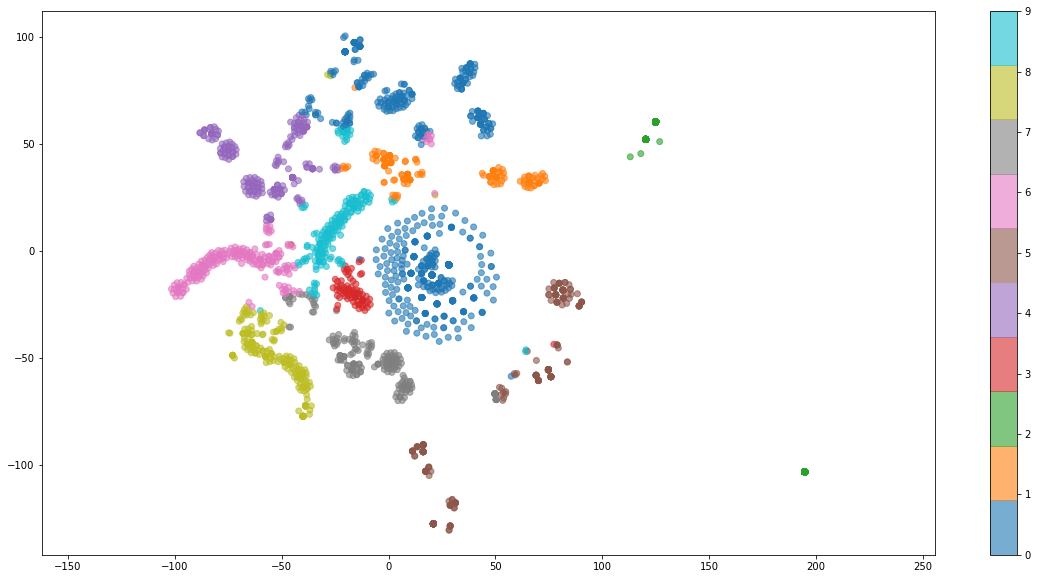

In [21]:
plt.figure(figsize=(20,10))
#plt.scatter(tsne_ft2D[:,0],tsne_ft2D[:,1],c=topics_for_app_sorted[random_index],cmap='Spectral',alpha=0.6)
plt.scatter(tsne_ft2D[:,0],tsne_ft2D[:,1],c=topics_for_app_sorted[random_index],cmap='tab10',alpha=0.6)
plt.colorbar()
plt.axis('equal')
plt.show()